# Project: Investigate a Dataset - [TMDB Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

For this project, I will be working on the TMDB movie dataset. This dataset comes from TMDB and contains information about 10,000 movies including user ratings, revenue, budget, runtime, cast, popularity, title, etc. it consists of 21 columns in total.


### Question(s) for Analysis

1. What is the average budget of all movies?
2. Did any movie make a profit of 100,000,000 and above? If yes, how many?
3. Is there a relationship between the budget of a movie and the revenue it produces?

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#to get information about the data set
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Observation
1. There are 21 columns
2. There are 10866 entries
3. There are null values in somes columns such as cast, homepage, director, genres,etc
4. The data set contains the three types of data types, integers, objects and floats.
4. The unit of currency in relation to the columns relating to money such as budget and revenue is not mentioned.

Note: So for this analysis i will be working with Dollar as the currency unit.


### Data Cleaning
Here I am going to remove columns that i do not have a use for in this analysis, columns such as vote_count, imdb_id, homepage, tagline, etc. Also I will be checking and removing duplicate rows if there is any. Some movies in the csv file database has zero budget or zero revenue so I will be removing such entries. I will be replacing zero with NAN in the runtime column. And lastly I will be changing the format of the budget and revenue columns.

#### Removing columns that will not be used
The columns that I will be removing is: Id, imdb_id, popularity,budget_adj, revenue_adj, homepage, keywords, overview, vote_count, vote_average, release_year,release_date, director, tagline and production_companies.

In [4]:
#Creating a list of columns to be deleted
del_col = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average', 'release_year', 'release_date', 'director', 'tagline', 'production_companies']
tmdb_data = tmdb_data.drop(del_col, 1)
#view the new dataset
tmdb_data.head()

,budget,revenue,original_title,cast,runtime,genres
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller


#### Removing duplicate rows

In [5]:
rows, col = tmdb_data.shape
print('There are {} rows and {} columns.'.format(rows-1, col))
tmdb_data.drop_duplicates(keep = 'first', inplace=True)
rows, col = tmdb_data.shape
print('There are now {} rows and {} columns.'.format(rows-1, col))

There are 10865 rows and 6 columns.
There are now 10864 rows and 6 columns.


There was a duplicate row which has now been removed.

#### Removing zero's from the revenue and budget columns

In [6]:
#first create another list with just budget and revenue
budget_revenue_list = ['budget', 'revenue']
#replacing all zero values with NAN
tmdb_data[budget_revenue_list] = tmdb_data[budget_revenue_list].replace(0, np.NAN)
#removing all rows with NAN
tmdb_data.dropna(subset = budget_revenue_list, inplace=True)
rows, col = tmdb_data.shape
print('After removing zero entries we now have {} rows.'.format(rows-1))

After removing zero entries we now have 3853 rows.


#### Replacing zero's in the runtime column with NAN

In [7]:
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NAN)

#### Changing the format of the budget and revenue column

In [8]:
#first checking the data type
tmdb_data.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
runtime             int64
genres             object
dtype: object

In [9]:
#changing the data type
change_budget_revenue = ['budget', 'revenue']
tmdb_data[change_budget_revenue] = tmdb_data[change_budget_revenue].applymap(np.int64)
tmdb_data.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
runtime            int64
genres            object
dtype: object

### Research Question 1: What is the average movie budget?

In [10]:
def average(column):
    return tmdb_data[column].mean()
average('budget')

37203696.954852104

To get the average budget of movies, i used the code above and from the answer provided, the average budget of movies is approximately 37,203,696 dollars. I will also be using a histogram to analye this question.

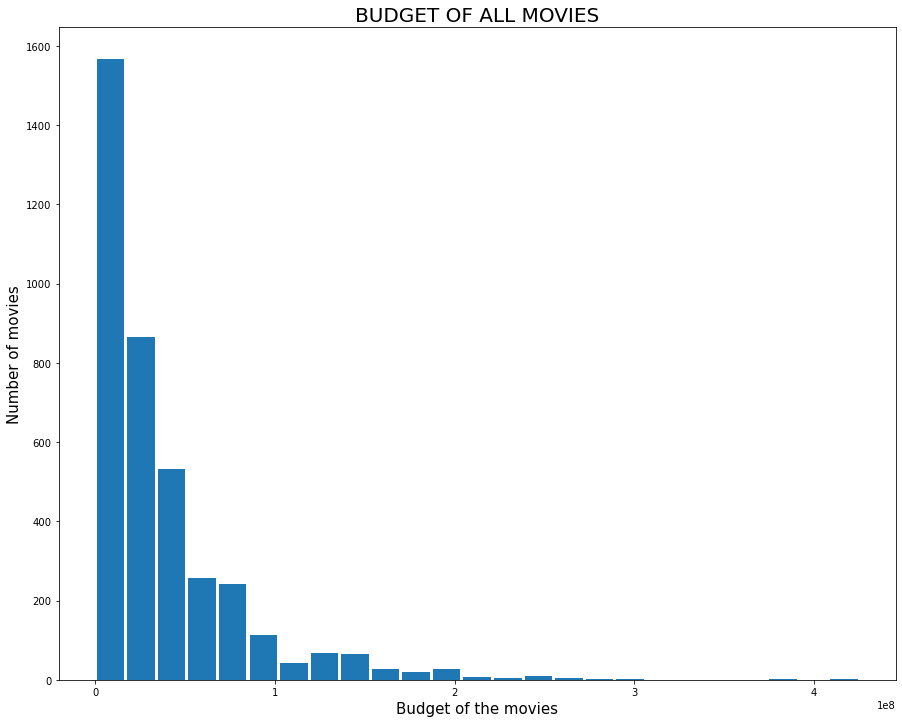

In [11]:
plt.figure(figsize = (15, 12))
plt.xlabel('Budget of the movies', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.title('BUDGET OF ALL MOVIES', fontsize = 20)
plt.hist(tmdb_data['budget'], rwidth = 0.9, bins =25);

From the histogram above over 1500 movies budget is between the range of 16 to 50 million dollars.

## Research question 2: Did any movie movie make a profit of 100,000,000 and above? If yes, how many?

In knowing if any movies made a profit of 100 million dollars, I will first write a code that filers the dataset for movies with a profit of 100 million dollars and above. 
If it returns no data then no movie made it to and across the $100,000,000 mark, but if it returns data of movies that made it to and across the mark then we proceed to writing a code to calculate of find out how many movies made it to and across the mark.

In [13]:
#i first have to calculate the profit made by each movie and create a new column called profit in the dataframe
tmdb_data.insert(2, 'profit', tmdb_data['revenue']-tmdb_data['budget'])
tmdb_data.head()

,budget,revenue,profit,original_title,cast,runtime,genres
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller


In [14]:
#now that i have calculated and created a column for profit i can now go to the main question
mini_profit = tmdb_data[tmdb_data['profit'] >= 100000000]
mini_profit.head()

,budget,revenue,profit,original_title,cast,runtime,genres
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller


From the dataframe above I can see that some movies reached and passed the profit mark, I will now find out how many movies made a $100,000,000 and above in profit.

In [15]:
len(mini_profit)

826

From the above, I have deduced that 826 movies made at least $100,000,000 profit.

## Research question 3: Is there a relationship between the budget of a movie and the revenue it produces?

To check for the relationship between the budget of a movie and the revenue i will bw using a scattered plot for this analysis.

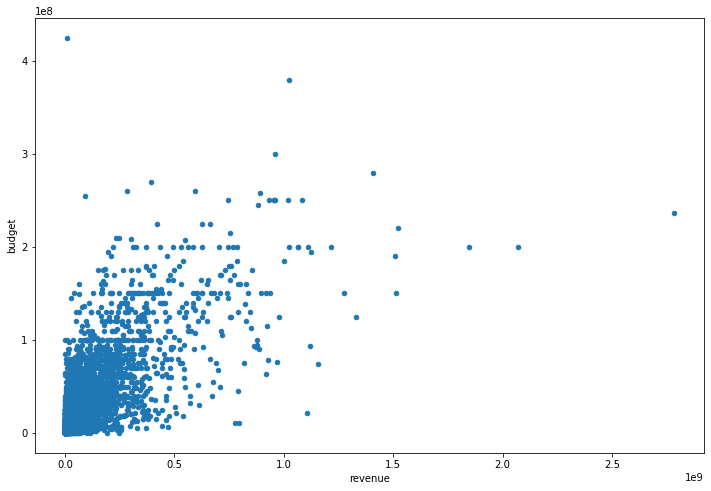

In [16]:
#relationship between budget and revenue
tmdb_data.plot(x= 'revenue', y = 'budget', kind = 'scatter', figsize = (12,8));


from the scattered plot above, it is deduced that a higher budget does not lead to a higher revenue as there is no correlation between the 2.

<a id='conclusions'></a>
## Conclusions

This was an interesting analysis. After this analysis, i have come up with some very interesting facts about movies. Below are the conclusions from my analysis process above:

1. The average movie budget is 37,203,696 dollars.
2. 826 Movies made 100,000,000 and above in profit.
3. There is no relationship between the budget of producing a movie and the revenue the movie produces as there is absolutely no correlation between them.

From this analysis, a movie's revenue has no relationship with th budget allocated for production, so there is no such thing as the more you spend on the budget the more revenue the movie will bring. the profitability of the movie depends on other factors. And in other to produce a movie that is likely to be succesful your average budget for production should be around 37,203,696 dollars. 
Further analysis can still be carried out in continuation with this analysis, for example analysis can be carried out to find out what the most profitable movie gerne are, what the average movie run time is, who are the most common cast members in successfull movies, etc

Limitations: The tmdb movie data set is one that includes a lot of missing datas and as such reduces the accuracy of the analysis because, the missing values are either replaced with an average approximation or the entire row is totally removed. The budget and revenue column do not have a currency unit and for this analysis i chosse to work with the dollar currency but it could be possible that some movies budget and revenue use a different currency.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset(1).ipynb'])

4294967295